<a href="https://colab.research.google.com/github/Lina1719/4thassignment/blob/main/Natural_Language_Processing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 691 kB 5.2 MB/s 
     |████████████████████████████████| 240 kB 50.3 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=9cad266351643c0aaa9645a13b241cd90e05729c072da1bf7a872ee4e185f984
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [7]:
# Importing Packages 
from __future__ import print_function

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import stanza
import json
import re
import csv

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier


# Donwload arabic models for stanza (which is based on Stanford CoreNLP)
stanza.download('ar')


INFO:stanza:Downloading default packages for language: ar (Arabic) ...
INFO:stanza:File exists: /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [8]:
nlp = stanza.Pipeline(lang='ar', processors='tokenize,mwt,pos,lemma', download_method=None)

INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package |
-----------------------
| tokenize  | padt    |
| mwt       | padt    |
| pos       | padt    |
| lemma     | padt    |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [9]:
with open("/content/test_Arabic_tweets_negative_20190413.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        print(line)

Streaming output truncated to the last 5000 lines.
['neg', '*هذا هو الهلال إذن بكل بساطة : إنتظار هدايا من الحكم أو من الحظ : طرد لاعب الأهلي والتغافل عم طرد البريك اللي يستاه…']
['neg', 'قبضوا امنجي في في نقطة تفتيش معاه مسدس و قيل مسدسين مافي اي هجوم حصل حركة بتاعت جري بدون سبب و خوف المهم الدوشكا ضر…']
['neg', 'الالبوم بينفجر سعادة مثلي تماما 💔 #BLACKPINKxCoachella_D1']
['neg', 'ماعلى كتف الاياام راحه .. الراحه على كتفك انتي :(']
['neg', 'لنا الله 💔']
['neg', 'انا من الصعيد 😔']
['neg', 'تركي ال شيخ معقولة عندا هيج مكانية ؟!! ويكتب اغاني 🤔']
['neg', 'عامي سعيد بقربك والله :( 💓💓']
['neg', 'اول مره انزله والله دانا هموت وانزله لحد من زمان 😪']
['neg', 'واحد راح لعند رفيقو وقلوا قاصد الله وقاصدك$ قلوا : خير ؟؟ 🙄 قلوا : بدي ألف دولار 🙈 قلوا : كفي لعند الله 😂😂']
['neg', "اتمنى من الغريب العرفني على attar's music يكون بخير و سعيد .. بحاول اتذكر ال حقو لي سنتين 😔"]
['neg', 'اذا نمت وقمت وتذكرت مباراة اليوم 💔 #الاتحاد_النصر']
['neg', 'اذكري الله 😒']
['neg', 'على فكرة 🤪 كل ما كبر الأمل 😏 بيكبر

In [85]:
tsn = pd.read_csv('/content/test_Arabic_tweets_negative_20190413.tsv', sep='\t')
tsn

,neg,حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...
...,...,...
5762,neg,النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
5763,neg,استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
5764,neg,انا كنت اكل الصحن بكبره 😐
5765,neg,قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...


In [86]:
tsn.drop_duplicates(inplace=True)
tsn.dropna(inplace=True)
tsn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 5766
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   neg                                    4454 non-null   object
 1   حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭  4454 non-null   object
dtypes: object(2)
memory usage: 104.4+ KB


In [87]:
tsnd = tsn.groupby("neg").filter(lambda x: len(x) >= 300)
tsnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 5766
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   neg                                    4454 non-null   object
 1   حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭  4454 non-null   object
dtypes: object(2)
memory usage: 104.4+ KB


In [88]:
tsnd.columns= ["res","tweet"]
tsnd.head()

,res,tweet
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...


In [89]:
# Remove the /n/r from the full text
tsnd = tsnd.replace(r'\\n\\r',' . ',regex=True)
tsnd['tweet'][0]

'واحد تبع النظام السوري يقول أن المخابرات السورية وراء تحطم مركبة إسرائيلية على سطح القمر 😳 أول مرة أعرف أن القمر أق…'

In [90]:
tsnd_smpl = tsnd.sample(n=500)
tsnd_smpl['tweet'].value_counts()

😂الله يستر منهم ماجيين لوجه الله صدقيني 💔                                                                             1
باكل زق شربت كوفي ونا قيدني حاسة بانتفاخ الف اول م صحيت :( هه هذا ونا قلت بقاطق الحليب كت امزح مع نفسي                1
معافا بإذن الله تعالى ي صاحبي ✋                                                                                       1
لم يعد للحقائق المزيفه باتركي الشلهوب قيمه في النشر هنا الحقيقه تميم الغدر والخيانه يثني على دور ضبا…                 1
صحيح ان المسامح كريم لكن لا تستطيع ان تكون ذلك الكريم في كل المواقف 😥                                                 1
                                                                                                                     ..
اابي جاد بالشرق اهم شي اقل من كبار وخوال 🚫 #سالب_الرياض #مبادل_الرياض #موجب_الرياض                                    1
انتي غريبه وراك سر 🤔                                                                                                  1
اشوف الدنيا هنا مليانه حب وقلوب وياخي تس

In [91]:
tsp = pd.read_csv('/content/test_Arabic_tweets_positive_20190413.tsv', sep='\t')
tsp

,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…
0,pos,صباحك خيرات ومسرات 🌸
1,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
2,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
3,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
4,pos,اجيال القووه والصمود والتحدي اجيال المستقبل وا...
...,...,...
5746,pos,ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...
5747,pos,ربي يسعدنا وياكم 💛
5748,pos,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...
5749,pos,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...


In [92]:
tsp.drop_duplicates(inplace=True)
tsp.dropna(inplace=True)
tsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   pos                                                                                                                4386 non-null   object
 1   #الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…  4386 non-null   object
dtypes: object(2)
memory usage: 102.8+ KB


In [93]:
tspd = tsp.groupby("pos").filter(lambda x: len(x) >= 300)
tspd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   pos                                                                                                                4386 non-null   object
 1   #الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…  4386 non-null   object
dtypes: object(2)
memory usage: 102.8+ KB


In [94]:
tspd.columns= ["res","tweet"]
tspd.head()

,res,tweet
0,pos,صباحك خيرات ومسرات 🌸
1,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
2,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
3,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
4,pos,اجيال القووه والصمود والتحدي اجيال المستقبل وا...


In [95]:
# Remove the /n/r from the full text
tspd = tspd.replace(r'\\n\\r',' . ',regex=True)
tspd['tweet'][0]

'صباحك خيرات ومسرات 🌸'

In [96]:
tspd_smpl = tspd.sample(n=500)
tspd_smpl['tweet'].value_counts()

يربع طبيعي انا ولا اوفر لما العب بحسابين بوبجي 🙂                                                                     1
جعل من شوقه على عرش خفاقي مقيم ماانحرم من شوف زوله وطاريه وغلاه 💞                                                    1
يحيليلكم حمد الله بلحاله فريق 😂                                                                                      1
وقريبا ستقول " استجاب " بدلا من " سيستجيب " 💙 - رسالة لك                                                             1
بطقم معاك ☺️                                                                                                         1
                                                                                                                    ..
اطمئن : ليس من بعد العسر إلا اليسر ، ولا يغلق الله بابا إلا و يفتح خيرا منه ، وإن ضاق بك الحال فتذكر أن غيرك يحل…    1
(( من علامة حسن الخاتمة للمؤمن )) ▪ قال رسول الله ﷺ : (( المؤمن يموت بعرق الجبين )) 👈🏽 صحح…                          1
❥ °•° • أحذر حواء فهي سامه جدآ إذا ظلمت #الأميرة

In [98]:
df_all_rows = pd.concat([tspd_smpl, tsnd_smpl])
df_all_rows.tail()

,res,tweet
1092,neg,حلو ده 😂
1563,neg,الخميس الجاي اذاكر 💔
3874,neg,يارب نوصل مليون 😩
2383,neg,منجد و البعض مو راضي يقتنع 😭
3486,neg,شكله مترحل من السعودية بقضية هه ليه الحقد ذا ا...


In [148]:
# Splitting data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_all_rows['tweet'],df_all_rows['res'],test_size=0.2,random_state=42)

In [149]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [150]:
%%time

# pre-processing
full_text = []

 # POS Tags to be removed , as it represent stop words here
stop_ar = {'ADP','AUX','CCONJ','PART','PRON','SCONJ','PUNCT'}

for i in list(tspd_smpl['tweet']):
    # Remove all characters other than arabic ones
  txt = re.sub('[^ء-ي]', ' ', str(i)) 
    # Apply the stanza core nlp analyzer
  doc = nlp(txt)

  txt = [word.text for sent in doc.sentences for word in sent.words if (word.upos not in stop_ar and len(word.text) > 1)]
  txt = ' '.join(txt)
  full_text.append(txt)

CPU times: user 1min 30s, sys: 206 ms, total: 1min 30s
Wall time: 1min 33s


In [151]:
Tfidf_vect = TfidfVectorizer()
#Tfidf_vect.fit(dff_smpl['full_text'])
Tfidf_vect.fit(full_text)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
print (Test_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Train_X_Tfidf.shape)
print(Test_X_Tfidf.shape)

1287    🥀 كن مع الله ولا تبالي ومد يديك إليه في ظلمات ...
3620      هنا رحمت مينو 😔 ولا لمه يقوله لا تعصب دمووع 😭😭😂
3174                                   نشالله ونحن كمان 😢
4367                                 انتي غريبه وراك سر 🤔
3777                          وانت ما تستحي تخاوي حيوان 😎
                              ...                        
2563                                لا تحزن إن الله معك 💛
441     #الاهلي_الهلال الف الف مبروك والقادم أجمل بإذن...
972                    وبراطمه ماهي سوداء ويده ما ترتعش 😉
5234    تساؤل وردة هنا مبهر: بصو لي ملام، وئالو لي كلا...
3292    هنيئا لمن يقول : أنا بخير ، رغم .. خلع في الرو...
Name: tweet, Length: 200, dtype: object
(800, 2995)
(200, 2995)


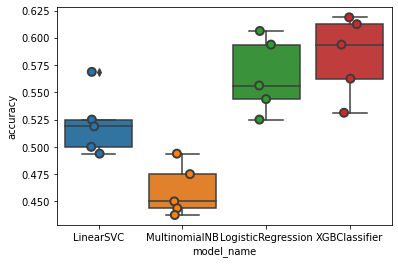

model_name
LinearSVC             0.52125
LogisticRegression    0.56500
MultinomialNB         0.46000
XGBClassifier         0.58375
Name: accuracy, dtype: float64

In [152]:
# Build ML - NLP Model and choose the best performing one


models = [
    LinearSVC(),
    MultinomialNB(),
    # Increase max_iter -->https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
    LogisticRegression(random_state=0),
    XGBClassifier()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, Train_X_Tfidf, Train_Y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
cv_df.groupby('model_name').accuracy.mean()


In [153]:
# Use the best performing model (SVC) for our predictions

model = XGBClassifier()
TFO = model.fit(Train_X_Tfidf,Train_Y)

In [154]:
# Classification report

y_eval = TFO.predict(Test_X_Tfidf)
print(metrics.classification_report(Encoder.inverse_transform(Test_Y),Encoder.inverse_transform(y_eval)))


              precision    recall  f1-score   support

         neg       0.59      0.44      0.51       104
         pos       0.52      0.67      0.59        96

    accuracy                           0.55       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.56      0.55      0.54       200



In [155]:
# Classification function

def svc_pred(txt):
  "wrapping our model into a function to use direclty over input texts"
  test = Tfidf_vect.transform([txt])
  g=TFO.predict_proba(test)
  h= np.amax(g, axis= 1)
  cat = Encoder.inverse_transform(TFO.predict(test))
  print(cat)
  print(h)

In [156]:
svc_pred('الاهلي_الهلال الف الف مبروك')

['pos']
[0.5099558]


In [157]:
def svc_pred_process(txt):
  stop_ar = {'ADP','AUX','CCONJ','PART','PRON','SCONJ','PUNCT'}
  txt = re.sub('[^ء-ي]', ' ', str(txt))
  doc = nlp(txt)
  txt = [word.text for sent in doc.sentences for word in sent.words if (word.upos not in stop_ar and len(word.text) > 1)]
  txt = ' '.join(txt)
  test = Tfidf_vect.transform([txt])
  g=TFO.predict_proba(test)
  h= np.amax(g, axis= 1)
  cat = Encoder.inverse_transform(TFO.predict(test))
  print(cat)
  print(h)

In [158]:
svc_pred_process('الاهلي_الهلال الف الف مبروك')

['pos']
[0.57212454]


In [106]:
trn = pd.read_csv('/content/train_Arabic_tweets_negative_20190413.tsv', sep='\t')
trn

,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
...,...,...
22508,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22509,neg,احسدك على الايم 💔
22510,neg,لأول مرة ما بنكون سوا 💔
22511,neg,بقله ليش يا واطي 🤔


In [107]:
trn.drop_duplicates(inplace=True)
trn.dropna(inplace=True)
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15094 entries, 0 to 22509
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   neg                                                       15094 non-null  object
 1   اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭  15094 non-null  object
dtypes: object(2)
memory usage: 353.8+ KB


In [108]:
trnd = trn.groupby("neg").filter(lambda x: len(x) >= 300)
trnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15094 entries, 0 to 22509
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   neg                                                       15094 non-null  object
 1   اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭  15094 non-null  object
dtypes: object(2)
memory usage: 353.8+ KB


In [109]:
trnd.columns= ["res","tweet"]
trnd.head()

,res,tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...


In [110]:
# Remove the /n/r from the full text
trnd = trnd.replace(r'\\n\\r',' . ',regex=True)
trnd['tweet'][0]

'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu'

In [111]:
trnd_smpl = trnd.sample(n=500)
trnd_smpl['tweet'].value_counts()

بيفكر هيفشخ اسمولينج الماتش الجاي بانهي طريقه وتقريبا هتبقا نفس طريقه اللي كسرت الفقره السادسه في ضهر بواتينج                          1
هه قناع للبشره 🌚                                                                                                                       1
،، 🌹 النوايا بيض والهقوه بعيده والهدف مرسوم ، والراس متعلي مابعد نزلت راسي للزهيده الزهيده مالها عندي محلي ✋                           1
يمكن لما تبتدي تحسي ،انا مش حاكون موجود 💔                                                                                              1
مملووك وربي 😭                                                                                                                          1
                                                                                                                                      ..
لما تشتاق ل شخص ميت ويش تسوي 💔 — مافي حل غير انك تدعيله صدقني بيرتاح داخل قبره وبترتاح انت نفسيا ❤️🙂                                   1
صغير ع #الفراک ✋ شبيكم #وياي خل اكبر شوي 

In [112]:
trp = pd.read_csv('/content/train_Arabic_tweets_positive_20190413.tsv' ,sep='\t')
trp

,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...
...,...,...
22755,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
22756,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂
22757,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
22758,pos,- ألطف صورة ممكن تعبر عن رمضان 💙


In [113]:
trp.drop_duplicates(inplace=True)
trp.dropna(inplace=True)
trp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14458 entries, 0 to 22757
Data columns (total 2 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   pos                                                                                                14458 non-null  object
 1   نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…  14458 non-null  object
dtypes: object(2)
memory usage: 338.9+ KB


In [114]:
trpd = trp.groupby("pos").filter(lambda x: len(x) >= 300)
trpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14458 entries, 0 to 22757
Data columns (total 2 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   pos                                                                                                14458 non-null  object
 1   نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…  14458 non-null  object
dtypes: object(2)
memory usage: 338.9+ KB


In [115]:
trpd.columns= ["res","tweet"]
trpd.head()

,res,tweet
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...


In [116]:
# Remove the /n/r from the full text
trpd = trpd.replace(r'\\n\\r',' . ',regex=True)
trpd['tweet'][0]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [117]:
trpd_smpl = trpd.sample(n=500)
trpd_smpl['tweet'].value_counts()

طبعا هذه أخبار مفحوصة لا قيمة لها مفاحيص فسو من كثر الجلوس على المقاهي لا شغلة ولا مشغلة يبحثون عن اي خبر طبعا أخب…    1
اللهم صباح في تفاصيله خير و بشرى لي ولكم 🌿                                                                             1
يتنحى عشان يمسك الرئاسة 😂                                                                                              1
احلى صباح يا جدو على عيونك. صباح الفراولة 🌹 💕 💕                                                                        1
صباح الخير ✨                                                                                                           1
                                                                                                                      ..
حكمة اليوم : لا تغلط على بنت قصيره ترى طولها كله بلسانها 😂                                                             1
وإياك يا رب 🌹 🌹                                                                                                        1
الموت لا يأخذ الشخص فحسب ، بل يأ

In [118]:
df_all = pd.concat([trnd_smpl, trpd_smpl])
df_all.tail()

,res,tweet
9629,pos,يا محلي عمري والأيام ♡
11307,pos,🌹🌹 صبااح الخير 🌹 🌹 إهداء مني لاحبتي ولمتابعيني...
19885,pos,جيمى نيترون و افاتار انج ❤
2209,pos,كل شيء يسبح لله فلا تكن أنت الغافل سبحان الله ...
10263,pos,مضاربة ماينكرافت في الواقع 😂


In [137]:
# Splitting data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_all['tweet'],df_all['res'],test_size=0.2,random_state=42)

In [138]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [139]:
%%time

# pre-processing
full_text = []

 # POS Tags to be removed , as it represent stop words here
stop_ar = {'ADP','AUX','CCONJ','PART','PRON','SCONJ','PUNCT'}

for i in list(trpd_smpl['tweet']):
    # Remove all characters other than arabic ones
  txt = re.sub('[^ء-ي]', ' ', str(i)) 
    # Apply the stanza core nlp analyzer
  doc = nlp(txt)

  txt = [word.text for sent in doc.sentences for word in sent.words if (word.upos not in stop_ar and len(word.text) > 1)]
  txt = ' '.join(txt)
  full_text.append(txt)

CPU times: user 1min 35s, sys: 210 ms, total: 1min 36s
Wall time: 1min 37s


In [140]:
Tfidf_vect = TfidfVectorizer()
#Tfidf_vect.fit(dff_smpl['full_text'])
Tfidf_vect.fit(full_text)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
print (Test_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Train_X_Tfidf.shape)
print(Test_X_Tfidf.shape)

1511                  أصبحنا و أصبح الملك لله صباح الخير 🌸
19277                     📹 أداء سولو في كوتشيلا - ابريل ،
22408    لا إله إلا الله العظيم الحليم لا إله إلا الله ...
6542                                       وإياك يا رب 🌹 🌹
21488                عذااب و الله 😥 يلا معلش ربنا معاكم 💅😂
                               ...                        
9792     هاجر امبارح تكلمني تقولي ع خير انا شايفاه حلو ...
4138     #الزمن_الجميل . الله ياوقت مضى لوهو بيدينا ماي...
19814    نصيحة : اجعل في حياتك حفرة صغيرة تدفن فيها أخط...
686      مباراة اليوم! ⚽ اياب ربع نهائي دوري ابطال افري...
15988                                   بكره استلم حريتي 😩
Name: tweet, Length: 200, dtype: object
(800, 2794)
(200, 2794)


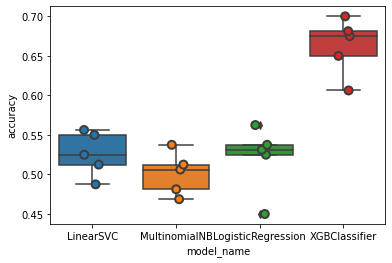

model_name
LinearSVC             0.52625
LogisticRegression    0.52125
MultinomialNB         0.50125
XGBClassifier         0.66250
Name: accuracy, dtype: float64

In [141]:
# Build ML - NLP Model and choose the best performing one


models = [
    LinearSVC(),
    MultinomialNB(),
    # Increase max_iter -->https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
    LogisticRegression(random_state=0),
    XGBClassifier()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, Train_X_Tfidf, Train_Y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
cv_df.groupby('model_name').accuracy.mean()


In [142]:
# Use the best performing model (SVC) for our predictions

model = XGBClassifier()
TFO = model.fit(Train_X_Tfidf,Train_Y)

In [143]:
# Classification report

y_eval = TFO.predict(Test_X_Tfidf)
print(metrics.classification_report(Encoder.inverse_transform(Test_Y),Encoder.inverse_transform(y_eval)))


              precision    recall  f1-score   support

         neg       0.59      0.90      0.71        96
         pos       0.82      0.43      0.57       104

    accuracy                           0.66       200
   macro avg       0.71      0.66      0.64       200
weighted avg       0.71      0.66      0.64       200



In [145]:
# Classification function

def svc_pred(txt):
  "wrapping our model into a function to use direclty over input texts"
  test = Tfidf_vect.transform([txt])
  g=TFO.predict_proba(test)
  h= np.amax(g, axis= 1)
  cat = Encoder.inverse_transform(TFO.predict(test))
  print(cat)
  print(h)

In [146]:
svc_pred('أصبحنا و أصبح الملك لله صباح الخير 🌸')

['pos']
[0.6983216]


In [144]:
def svc_pred_process(txt):
  stop_ar = {'ADP','AUX','CCONJ','PART','PRON','SCONJ','PUNCT'}
  txt = re.sub('[^ء-ي]', ' ', str(txt))
  doc = nlp(txt)
  txt = [word.text for sent in doc.sentences for word in sent.words if (word.upos not in stop_ar and len(word.text) > 1)]
  txt = ' '.join(txt)
  test = Tfidf_vect.transform([txt])
  g=TFO.predict_proba(test)
  h= np.amax(g, axis= 1)
  cat = Encoder.inverse_transform(TFO.predict(test))
  print(cat)
  print(h)

In [147]:
svc_pred_process('أصبحنا و أصبح الملك لله صباح الخير 🌸')

['pos']
[0.8272805]


In [47]:
# Checking the extracted attributes (tokens,lemma,POS tags) for an arabic sentnece 
doc = nlp('صباحك خيرات و مسرات')


In [48]:
# Check base tokens
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: صباحك
id: (2,)	text: خيرات
id: (3,)	text: و
id: (4,)	text: مسرات


In [49]:
# Check multi-word-tokens, Arabic specific stuff like connected pronouns metioned in the lecture

for token in doc.sentences[0].tokens:
    print(f'token: {token.text}\twords: {", ".join([word.text for word in token.words])}')

token: صباحك	words: صباحك
token: خيرات	words: خيرات
token: و	words: و
token: مسرات	words: مسرات


In [50]:
# Checking the extracted attributes (tokens,lemma,POS tags) for an arabic sentnece 
doc = nlp('إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل')


In [51]:
# Check base tokens
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: إذا
id: (2,)	text: أردت
id: (3,)	text: أن
id: (4,)	text: تعرف
id: (5,)	text: شيئا
id: (6,)	text: عني
id: (7,)	text: إسالني
id: (8,)	text: قبل
id: (9,)	text: أن
id: (10,)	text: تسأل


In [52]:
# Check multi-word-tokens, Arabic specific stuff like connected pronouns metioned in the lecture

for token in doc.sentences[0].tokens:
    print(f'token: {token.text}\twords: {", ".join([word.text for word in token.words])}')

token: إذا	words: إذا
token: أردت	words: أردت
token: أن	words: أن
token: تعرف	words: تعرف
token: شيئا	words: شيئا
token: عني	words: عني
token: إسالني	words: إسالني
token: قبل	words: قبل
token: أن	words: أن
token: تسأل	words: تسأل


In [ ]:
# Insert the twitter API creditionals that were obtained from your twitter developer account
# Note: You need to have a developer account 
import tweepy # for twitter 
consumerKey = "Enter Your String Here"
consumerSecret = "Enter Your String Here"
accessToken = "Enter Your String Here"
accessTokenSecret = "Enter Your String Here"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
# Sentiment Analysis
# Note: for further details about the above function , you could refre here : https://docs.tweepy.org/en/stable/api.html#search_tweets

def percentage(part,whole):
    "simple function to return percentages"
    return 100 * float(part)/float(whole)

# User inputs 
keyword = input("Please enter keyword or hashtag to search: ")
n_Tweet = int(input ("Please enter how many tweets to analyze: "))

# This is the most important step --> we call the API and return the requested hashtag/keyword tweets, we filtered only english tweets
tweets = tweepy.Cursor(api.search_tweets , q=keyword , lang='en').items(n_Tweet)

# Important initializations
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)

 # analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
    


In [ ]:
positive = percentage(positive, n_Tweet)
negative = percentage(negative, n_Tweet)
neutral = percentage(neutral, n_Tweet)
# polarity = percentage(polarity, n_Tweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
# Saving tweets in a dataframe
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

In [ ]:
# Creating Pie Chart for representing polarity as proportions for the collected tweets

# legend details 
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)

plt.style.use('default')
plt.legend(labels)

plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()